In the first part of the assignment we will work with the diatoms dataset, see the appendix below for
details.

In [1]:
# import packages, data, & set figure sizes
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

dataDia = np.loadtxt('diatoms.txt')

dataToy = np.loadtxt('pca_toydata.txt')

dataOccuTrain = np.loadtxt('occupancy_data.csv', delimiter=',')
dataOccu = dataOccuTrain[:,:-1]
dataOccu_labels = dataOccuTrain[:,-1]

dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
XTrain = dataTrain[:,:-1]
XTrain_labels = dataTrain[:,-1]

# Exercise 1  (Plotting cell shapes, 10 points). 
Plot one of the cells by plotting the landmark points
and interpolating between subsequent landmark points.
Next, plot all the cells on top of each other. Can you see any dataset tendencies from this plot?
When plotting, make sure to make the axes equal to get the right dimensions. If you use matplotlyb.pyplot
this can be done by typing plt.axis(’equal’).
Deliverables. A plot of a cell, a plot of many cells, and a short description

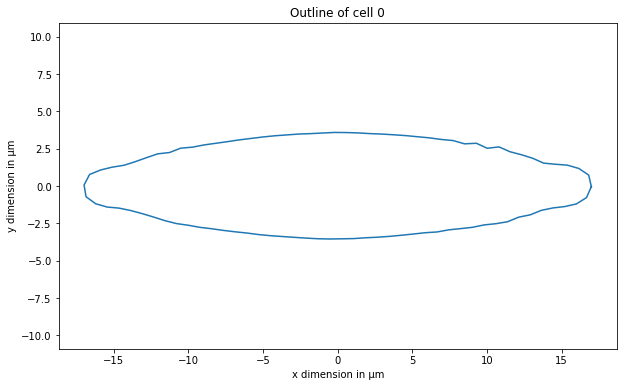

In [2]:
# plot cell from given data with given index, default: 0
def plot_cell(data, idx='0'):
    plt.plot(np.append(data[0::2], data[0::2][0]), np.append(data[1::2], data[1::2][0]));
    plt.axis('equal')
    plt.ylabel('y dimension in μm');
    plt.xlabel('x dimension in μm');
    plt.title(f'Outline of cell {cell_idx}')

cell_idx = 0
plot_cell(dataDia[cell_idx], str(cell_idx))

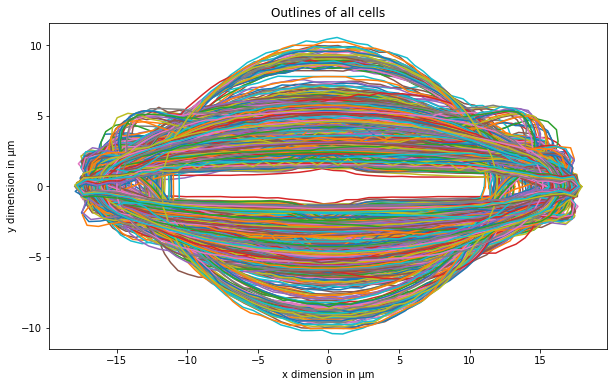

In [3]:
# iter over all cells and plot them
for cell in dataDia:
    plot_cell(cell)
plt.title('Outlines of all cells')
plt.show()

# Exercise 2  (Visualizing variance in visual data, 10 points). 
Now, you will visualize the spatial variance
of the cells by plotting some instances of the first three PCs. That is, if the mean of the data is given
by m, you are going to plot the ”cells”

m − 2σ1e1 m − σ1e1 m m + σ1e1 m + 2σ1e1

m − 2σ2e2 m − σ2e2 m m + σ2e2 m + 2σ2e2

m − 2σ3e3 m − σ3e3 m m + σ3e3 m + 2σ3e3.

where the e1, e2 and e3 are the eigenvectors defining the first three PCs, and σ1, σ2 and σ3 denote the
standard deviation of the data projected onto each of the first three PCs.
Plot the five cells corresponding to each PC in a single plot, and illustrate the temporal development
with a changing colour. This can, for instance, be done by importing a colormap with blues =
plt.get cmap(’Blues’), where blues(x) returns a different shade of blue for every number x between
0 and 1.
Describe the variance captured by the three components.
1
Deliverables. Three plots with sequences of cells showing the variance. A description of the three
components.

In [4]:
# function from assignment 3
def pca(data):
    # subtract off the mean for each dimension
    data_mean = data - np.mean(data, 0)
    
    # transpose data & calculate covariance matrix
    data_covar = np.cov(data_mean.T)
    
    # eigenvalues and eigenvectors
    data_eigenval, data_eigenvec = np.linalg.eigh(data_covar)
    
    # reverse with same indexing
    idx = data_eigenval.argsort()[::-1]   
    data_eigenval = data_eigenval[idx]
    data_eigenvec = data_eigenvec[:,idx]
        
    return data_eigenval, data_eigenvec, np.mean(data, axis=0)

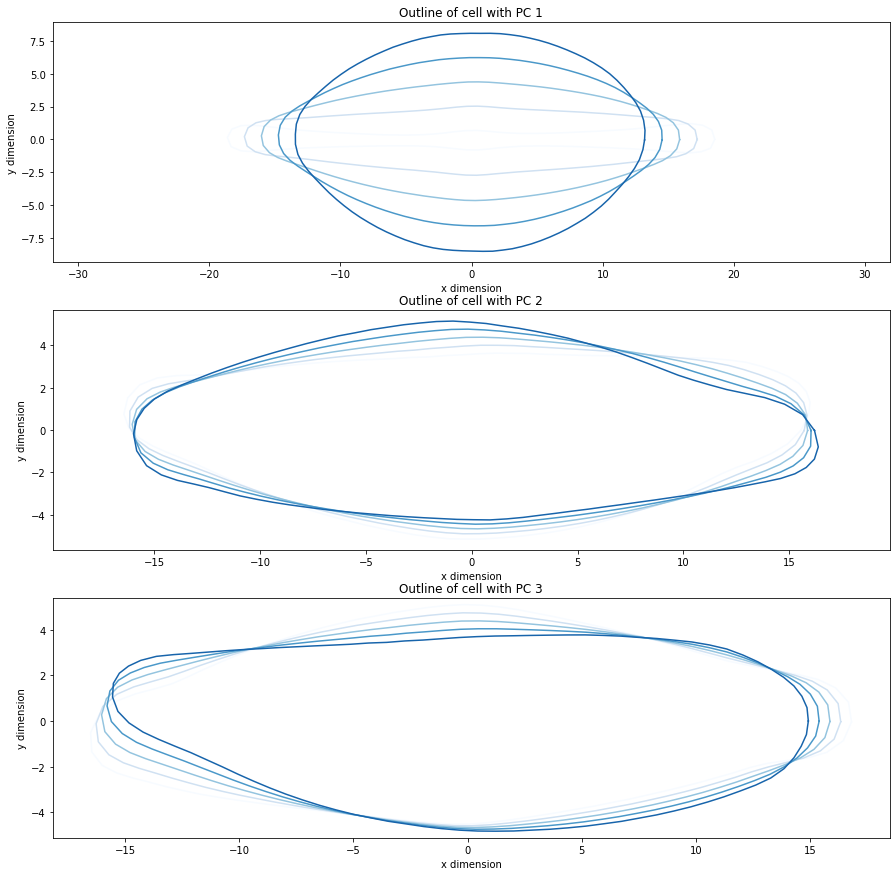

In [5]:
# create subplot, set height and colors
fig, ax = plt.subplots(3, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
blues = plt.get_cmap('Blues')

# get eigenvalues, -vectors, and the mean, set constant
eigval, eigvec, m = pca(dataDia)
sig_val = -2

# iter over the 3 subplots / first 3 entries in PCA data
for i in range(3):
    # set standarddeviation in respect to current PC
    sigma = np.sqrt(eigval[i])
    
    for j in range(0, 10, 2):
        # plot five shapes according to the following formular (suggested by the assignment)
        # 1. m−2σe, 2. m−σe, 3. m, 4. m+σe, 5. m+2σe
        # to make degree of variance visible throughout the first 3 PCs
        curr_x_vec = m[0::2]+(sig_val*sigma*eigvec[0::2,i])
        curr_y_vec = m[1::2]+(sig_val*sigma*eigvec[1::2,i])
        ax[i].plot(np.append(curr_x_vec, curr_x_vec[0]), np.append(curr_y_vec, curr_y_vec[0]), color=blues(j/10));
        ax[i].axis('equal')
        ax[i].set_ylabel('y dimension');
        ax[i].set_xlabel('x dimension');
        ax[i].set_title(f'Outline of cell with PC {i+1}')
        sig_val += 1
    sig_val = -2
plt.show()

In [6]:
# multidimensional scaling for input data & d number of dimensions
# taken from assignment 3
def mds(data, d):
    # get PCA components
    variance, components, mean = pca(data)
    # slice number of PCs
    components = components[:,:d]
    # compute dot product to get projection
    matrix = np.dot(data, components)
    return matrix

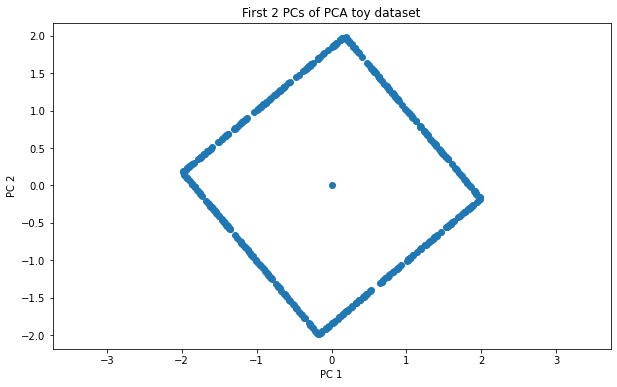

In [7]:
# perform mds and plot it for complete data set
matrix = mds(dataToy, 2)
plt.scatter(matrix[:,0], matrix[:,1]);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')
plt.title('First 2 PCs of PCA toy dataset')
plt.show()

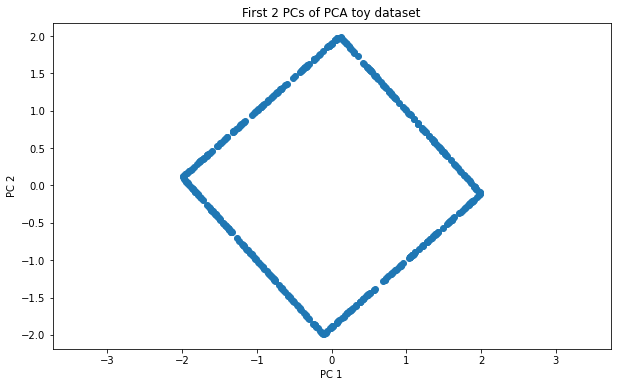

In [8]:
# perform mds & plot it without last two points
matrix = mds(dataToy[:-2], 2)
plt.scatter(matrix[:,0], matrix[:,1]);
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')
plt.title('First 2 PCs of PCA toy dataset')
plt.show()

# Clustering II
This exercise continues Exercise 2 and Exercise 3 from the previous Assignment 3.
In Exercise 2 from Assignment 3, you were asked to perform PCA on IDSWeedCropTrain.csv and
to visualize the data by projecting it on the first two 2 principal components. In Exercise 3 from
Assignment 3, you were asked to cluster the training data in IDSWeedCropTrain.csv using k-means
clustering with k = 2 using the first two data points in IDSWeedCropTrain.csv as starting points.
Now we bring these two exercises together. You are suppose to visualize the cluster centres.

# Exercise 4 (Clustering II, 10 points). 
Visualize the data in IDSWeedCropTrain.csv by projecting
it onto its first principal components (as in Exercise 2 from Assignment 3). Colour the data points
according to their class. Take the centres you found in Exercise 3 from Assignment 3 (2-means
clustering of the input data in IDSWeedCropTrain.csv, the cluster centres initialized with the first
two data points). Then project the centres onto the first two principal components found in the
previous step and visualize them together with the data points (i.e., in the same plot). Briefly discuss
whether you got meaningful clusters.

Deliverables. Description of software used; projection of the two cluster centres (i.e., two twodimensional vectors), a 2D plot visualizing the data and the cluster centres, short discussion of results

In [9]:
from sklearn.cluster import KMeans

cluster centers:
[[-2993.12258233 -2537.69938273]
 [    5.77619091 -2738.3200362 ]]


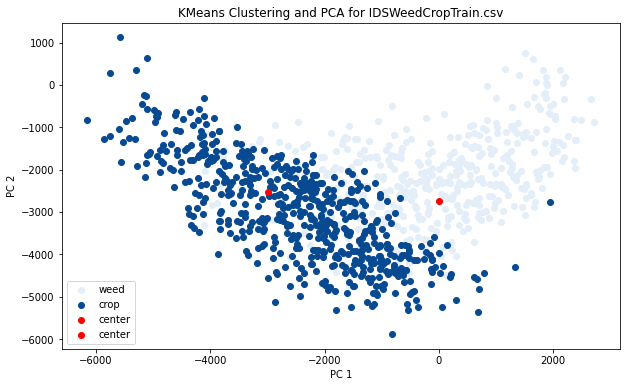

In [10]:
# compute projection matrix for first two PCs from IDS data set and 
mds_Xtrain = mds(XTrain, 2)
# initilize KMeans class
kmeans_weed = KMeans(n_clusters=2, random_state=42, algorithm='full', n_init=1)
# fit the PCs of the projection and save it's cluster centers and print them
kmeans_weed.fit(mds_Xtrain)
weed_centers = kmeans_weed.cluster_centers_
print(f'cluster centers:\n{weed_centers}')

# then fit the train data itself
kmeans_weed.fit(XTrain)

# perform PCA on the train data & separate x and y values for visibility
pca_weed = mds(XTrain, 2)
x_weed = pca_weed[:,0]
y_weed = pca_weed[:,1]

# get indices of weed and crops
idx0 = np.where(XTrain_labels==0)
idx1 = np.where(XTrain_labels==1)

# plot original data with color graded label information
plt.scatter(x_weed[idx0], y_weed[idx0], color=blues(0.1), label='weed')
plt.scatter(x_weed[idx1], y_weed[idx1], color=blues(0.9), label='crop')
# plot cluster centers
plt.scatter(weed_centers[0,0], weed_centers[0,1], color="r", label='center')
plt.scatter(weed_centers[1,0], weed_centers[1,1], color="r", label='center')
plt.legend();
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('KMeans Clustering and PCA for IDSWeedCropTrain.csv')
plt.show()

# Exercise 5 (Clustering III, 10 points). 
Perform 2-means clustering on the occupancy_data.csv and
report the center values as you did in exercise 3 of Assignment 3 with the crop dataset. Initialise
you 2-means the same way. Visualise the data in occupancy_data.csv by projecting it onto its first
principal components (as in Exercise 2 from Assignment 3). Colour the data points according to their
class. Take the centres you found above and project them onto the first two principal components
found in the previous step and visualize them together with the data points (i.e., in the same plot).
Briefly discuss whether you got meaningful clusters.

Deliverables. Description of software used;projection of the two cluster centres (i.e., two two-dimensional
vectors), a 2D plot visualizing the data and the cluster centres, short discussion of results

cluster centers:
[[-2993.12258233 -2537.69938273]
 [    5.77619091 -2738.3200362 ]]


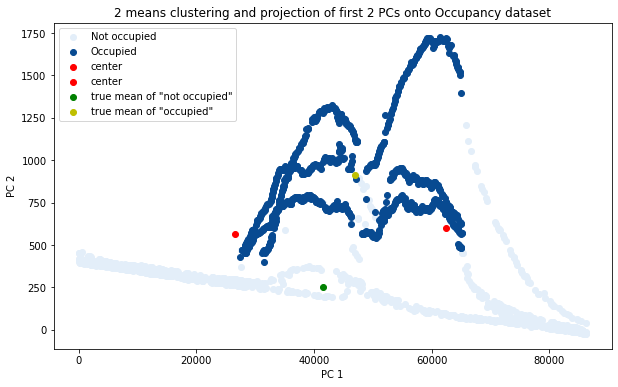

In [11]:
# compute projection matrix for first two PCs from occupancy data set and 
mds_occ = mds(dataOccu, 2)
# initilize KMeans class
kmeans_occ = KMeans(n_clusters=2, random_state=42, algorithm='full', n_init=1)
# fit the PCs of the projection and save it's cluster centers and print them
kmeans_occ.fit(mds_occ)
occ_centers = kmeans_occ.cluster_centers_
print(f'cluster centers of occupancy data:\n{occ_centers}')

# then fit the train data itself
kmeans_occ.fit(dataOccu)

# perform PCA on the train data & separate x and y values for visibility
pca_occ = mds(dataOccu, 2)
x_occ = pca_occ[:,0]
y_occ = pca_occ[:,1]

# get indices of occupied and not occupied data points
idx0 = np.where(dataOccu_labels==0)
idx1 = np.where(dataOccu_labels==1)

# plot original data with color graded label information
plt.scatter(x_occ[idx0], y_occ[idx0], color=blues(0.1), label='Not occupied')
plt.scatter(x_occ[idx1], y_occ[idx1], color=blues(0.9), label='Occupied')
# plot cluster centers
plt.scatter(occ_centers[0,0], occ_centers[0,1], color="r", label='center')
plt.scatter(occ_centers[1,0], occ_centers[1,1], color="r", label='center')

# true mean of the two classes
plt.scatter(np.mean(x_occ[idx0]), np.mean(y_occ[idx0]), color="g", label='true mean of "not occupied"')
plt.scatter(np.mean(x_occ[idx1]), np.mean(y_occ[idx1]), color="y", label='true mean of "occupied"')

plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2 means clustering and projection of first 2 PCs onto Occupancy dataset')
plt.show()

# Exercise 6 (Virtual Chocolate Box (no points)). 
Using Matplotlib3d, redo the previous visualisation for the data in occupancy_data.csv by projecting it onto their 3 first principal components,
colouring each point by the corresponding cluster and display the k-means data centres. Then display
the data again (separately) but this time colour it by the true class labels of the data. Deliverables.
Description of the software. Short discussion of results.